#Resource

https://stackoverflow.com/questions/61901365/modulenotfounderror-no-module-named-sklearn-externals-six

https://stackoverflow.com/questions/28312534/graphvizs-executables-are-not-found-python-3-4

https://mljar.com/blog/visualize-decision-tree/


# A graphical example

In [35]:
%pip install sklearn
%pip install mglearn
%brew install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%brew` not found.

[notice] A new release of pip is available: 23.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [37]:
import numpy as np
from matplotlib import pyplot
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the features and labels
features = X[:, :2]  # Using the first two features

# Some functions to plot data and models
def plot_points(features, labels, size_of_points=100):
    X = np.array(features)
    y = np.array(labels)
    class1 = X[np.argwhere(y == 0)]
    class2 = X[np.argwhere(y == 1)]
    class3 = X[np.argwhere(y == 2)]
    pyplot.scatter([s[0][0] for s in class1],
                   [s[0][1] for s in class1],
                   s=size_of_points,
                   color='red',
                   edgecolor='k',
                   marker='^')
    pyplot.scatter([s[0][0] for s in class2],
                   [s[0][1] for s in class2],
                   s=size_of_points,
                   color='green',
                   edgecolor='k',
                   marker='s')
    pyplot.scatter([s[0][0] for s in class3],
                   [s[0][1] for s in class3],
                   s=size_of_points,
                   color='blue',
                   edgecolor='k',
                   marker='o')

def plot_model(X, y, model, size_of_points=100):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pyplot.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1, 3))
    pyplot.contour(xx, yy, Z, colors='k', linewidths=1)
    plot_points(X, y, size_of_points)
    pyplot.show()

def display_tree(tree, feature_names):
    left = tree.children_left
    right = tree.children_right
    threshold = tree.threshold
    features = [feature_names[i] for i in tree.feature]

    for i in range(tree.node_count):
        if left[i] == right[i]:  # leaf node
            print(f"Leaf node, class {np.argmax(tree.value[i])}")
        else:
            print(f"Decision node, feature: {features[i]}, threshold: {threshold[i]}")
            

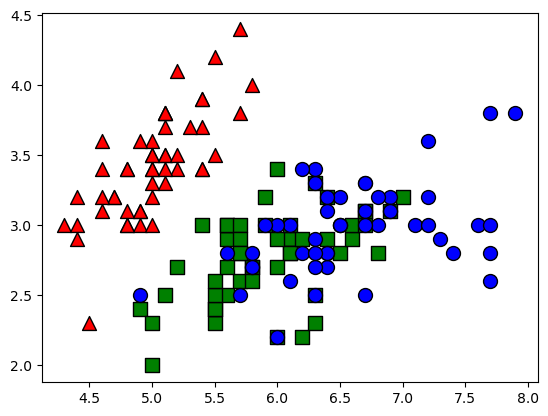

In [38]:
plot_points(features, y)
pyplot.show()

In [39]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import utils

# Building a decision tree using Gini index

In [40]:
max_depth = 3
decision_tree = DecisionTreeClassifier(max_depth=max_depth)
decision_tree.fit(features, y)
decision_tree.score(features, y)

0.8133333333333334

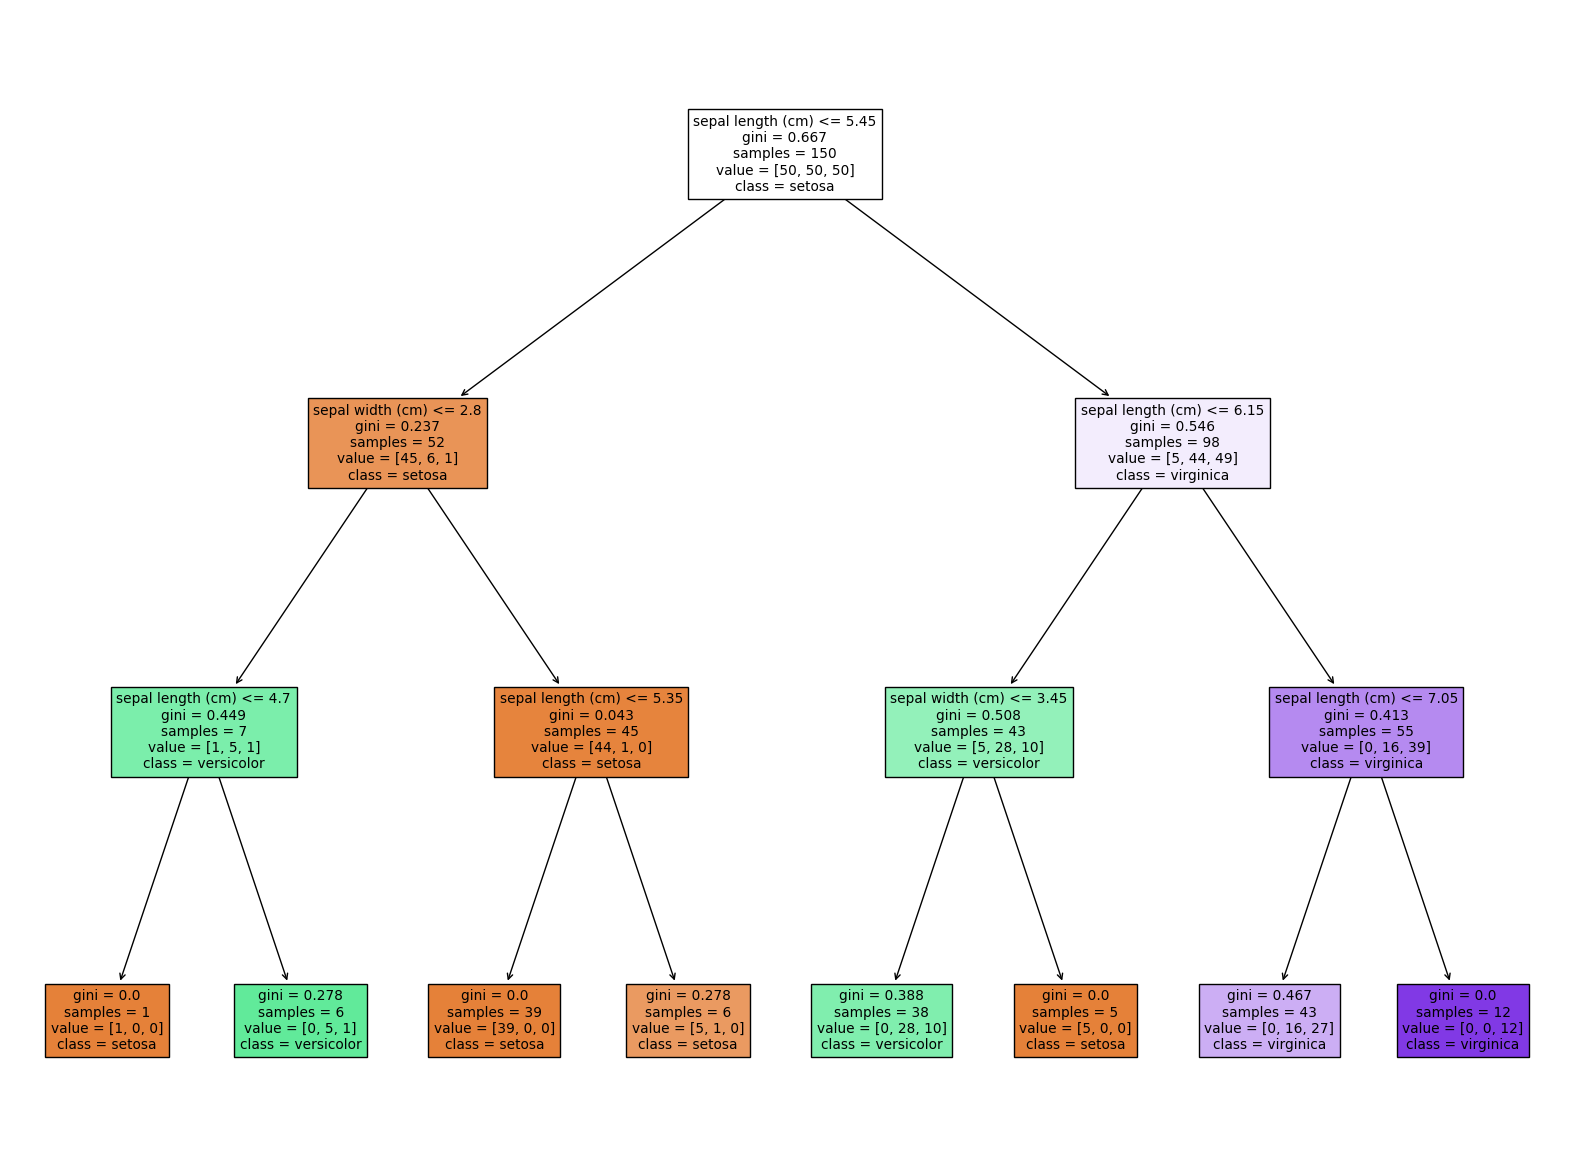

In [41]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(decision_tree, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

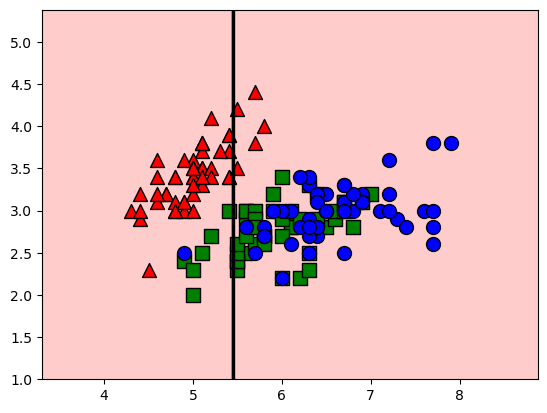

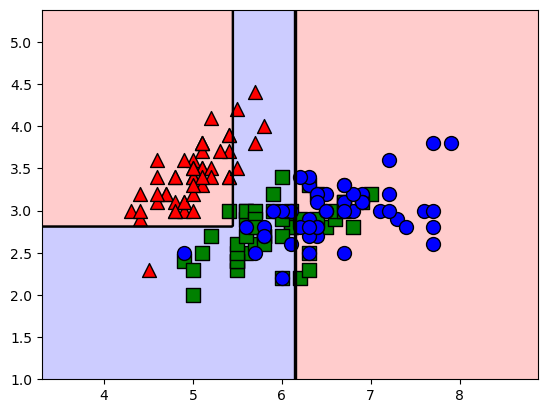

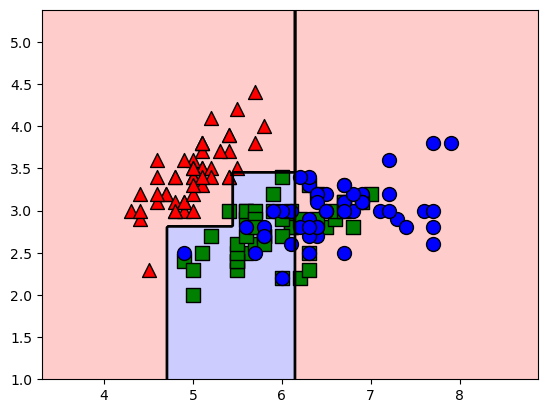

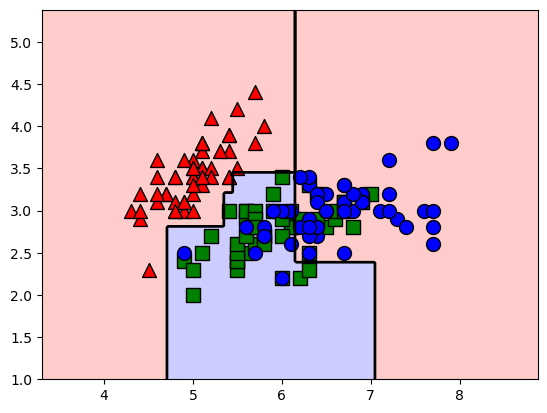

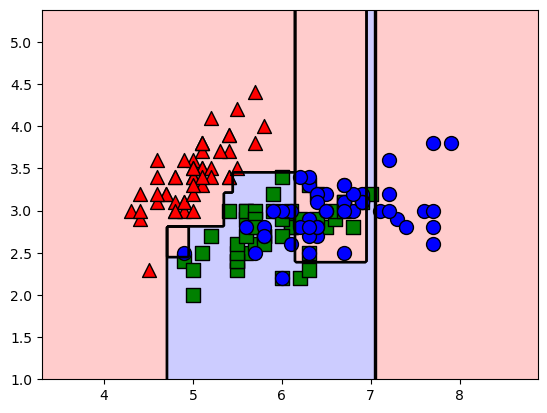

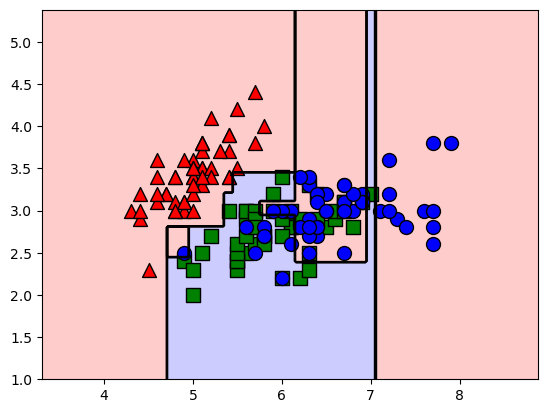

In [42]:
# Plot the 6 decision trees
for max_depth in range(1, 7):
    decision_tree = DecisionTreeClassifier(max_depth=max_depth)
    decision_tree.fit(features, y)
    plot_model(features, y, decision_tree)
    plt.show()

# Building a decision tree using entropy

In [43]:
max_depth = 3
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
decision_tree_entropy.fit(features, y)
decision_tree_entropy.score(features, y)

0.8066666666666666

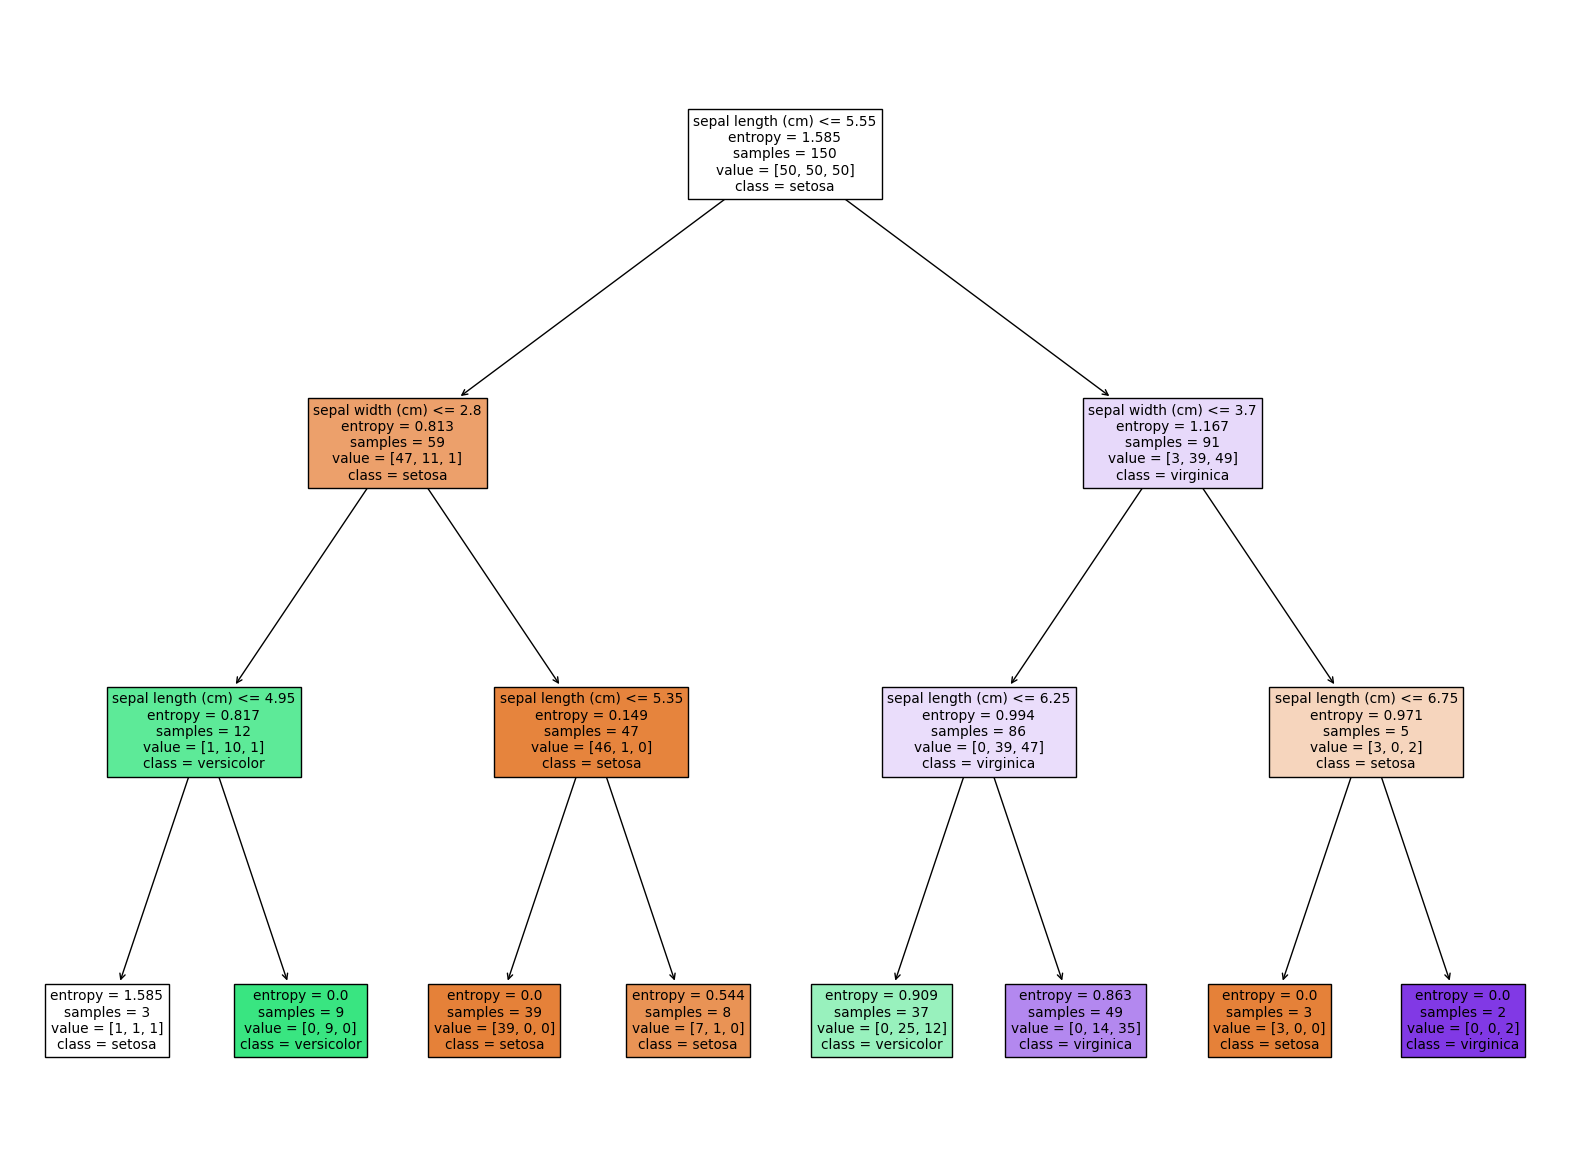

In [44]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(decision_tree_entropy, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

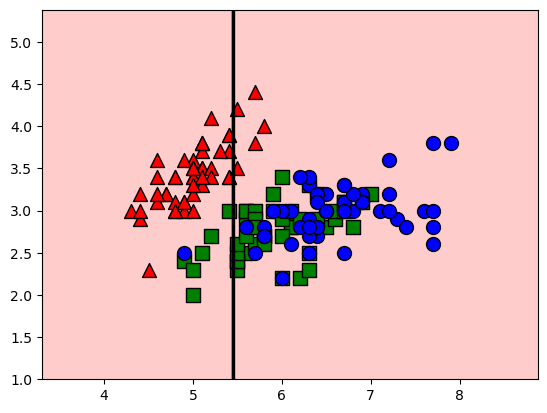

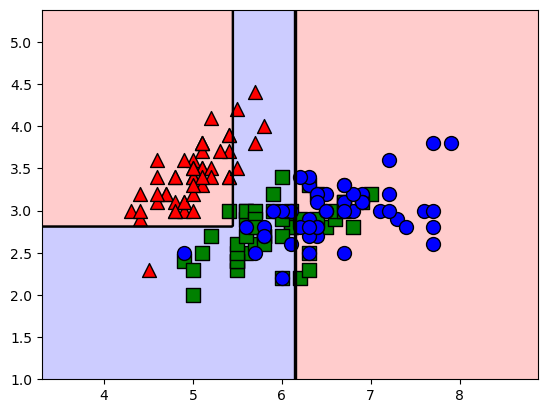

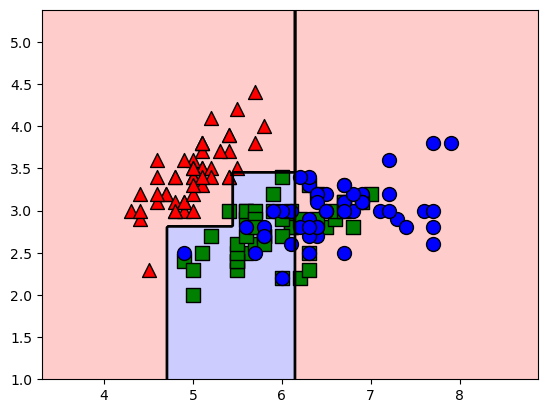

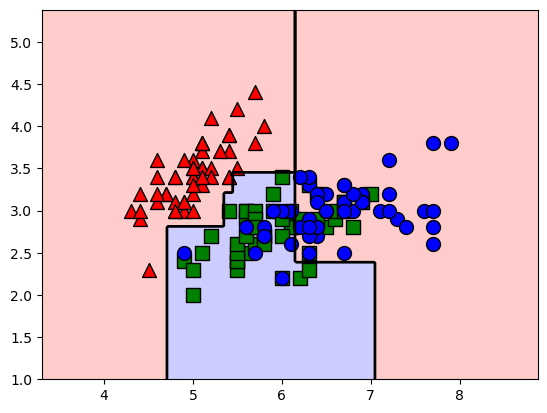

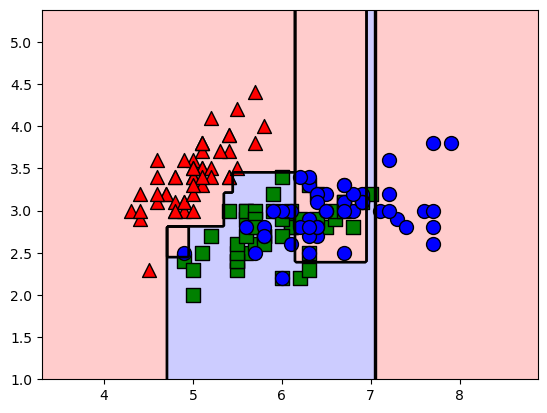

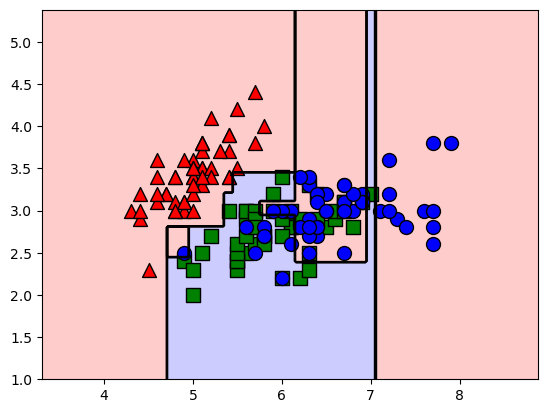

In [45]:
# Plot the 6 decision trees
for max_depth in range(1, 7):
    decision_tree_entropy = DecisionTreeClassifier(max_depth=max_depth)
    decision_tree_entropy.fit(features, y)
    plot_model(features, y, decision_tree_entropy)
    plt.show()

# Building a decision tree of depth one (a vertical or horizontal line)

In [46]:
decision_tree_depth_1 = DecisionTreeClassifier(max_depth=1)
decision_tree_depth_1.fit(features, y)
decision_tree_depth_1.score(features, y)

0.6266666666666667

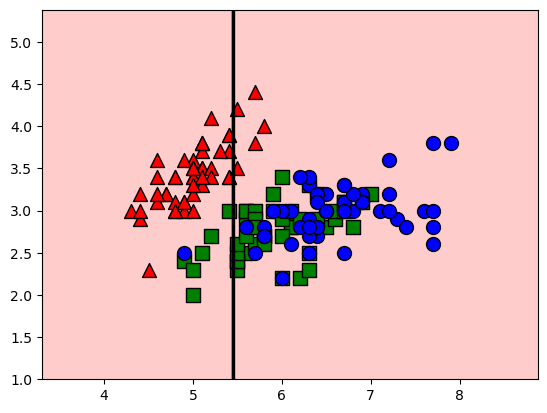

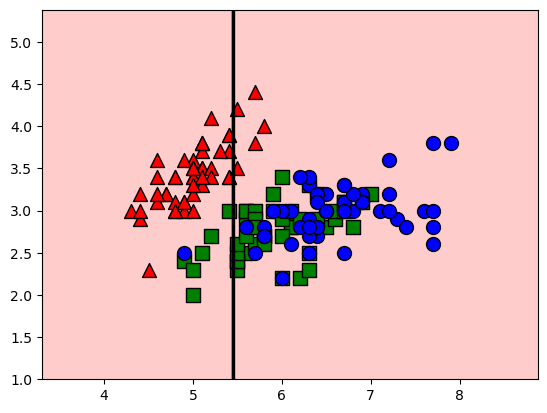

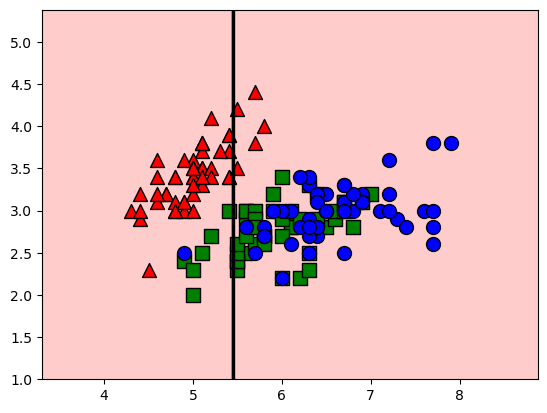

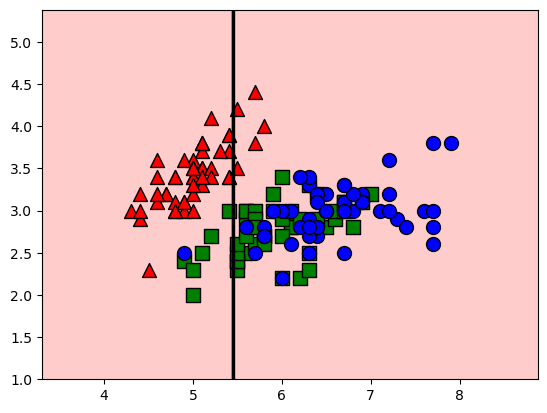

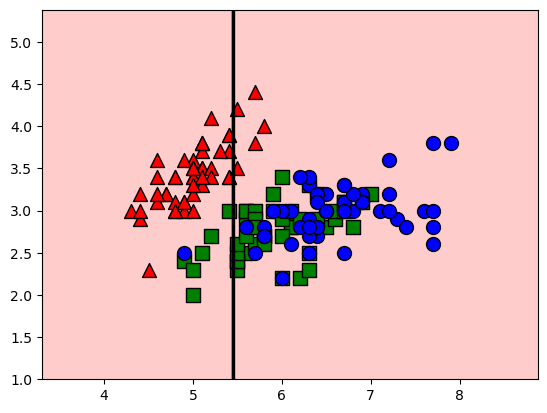

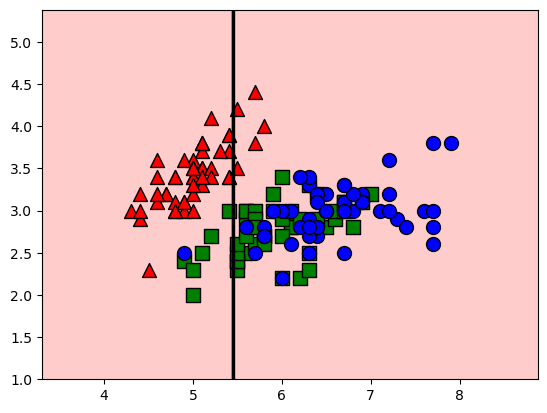

In [47]:
# Plot the 6 decision trees
for max_depth in range(1, 7):
    decision_tree_depth_1 = DecisionTreeClassifier(max_depth=1)
    decision_tree_depth_1.fit(features, y)
    plot_model(features, y, decision_tree_depth_1)
    plt.show()

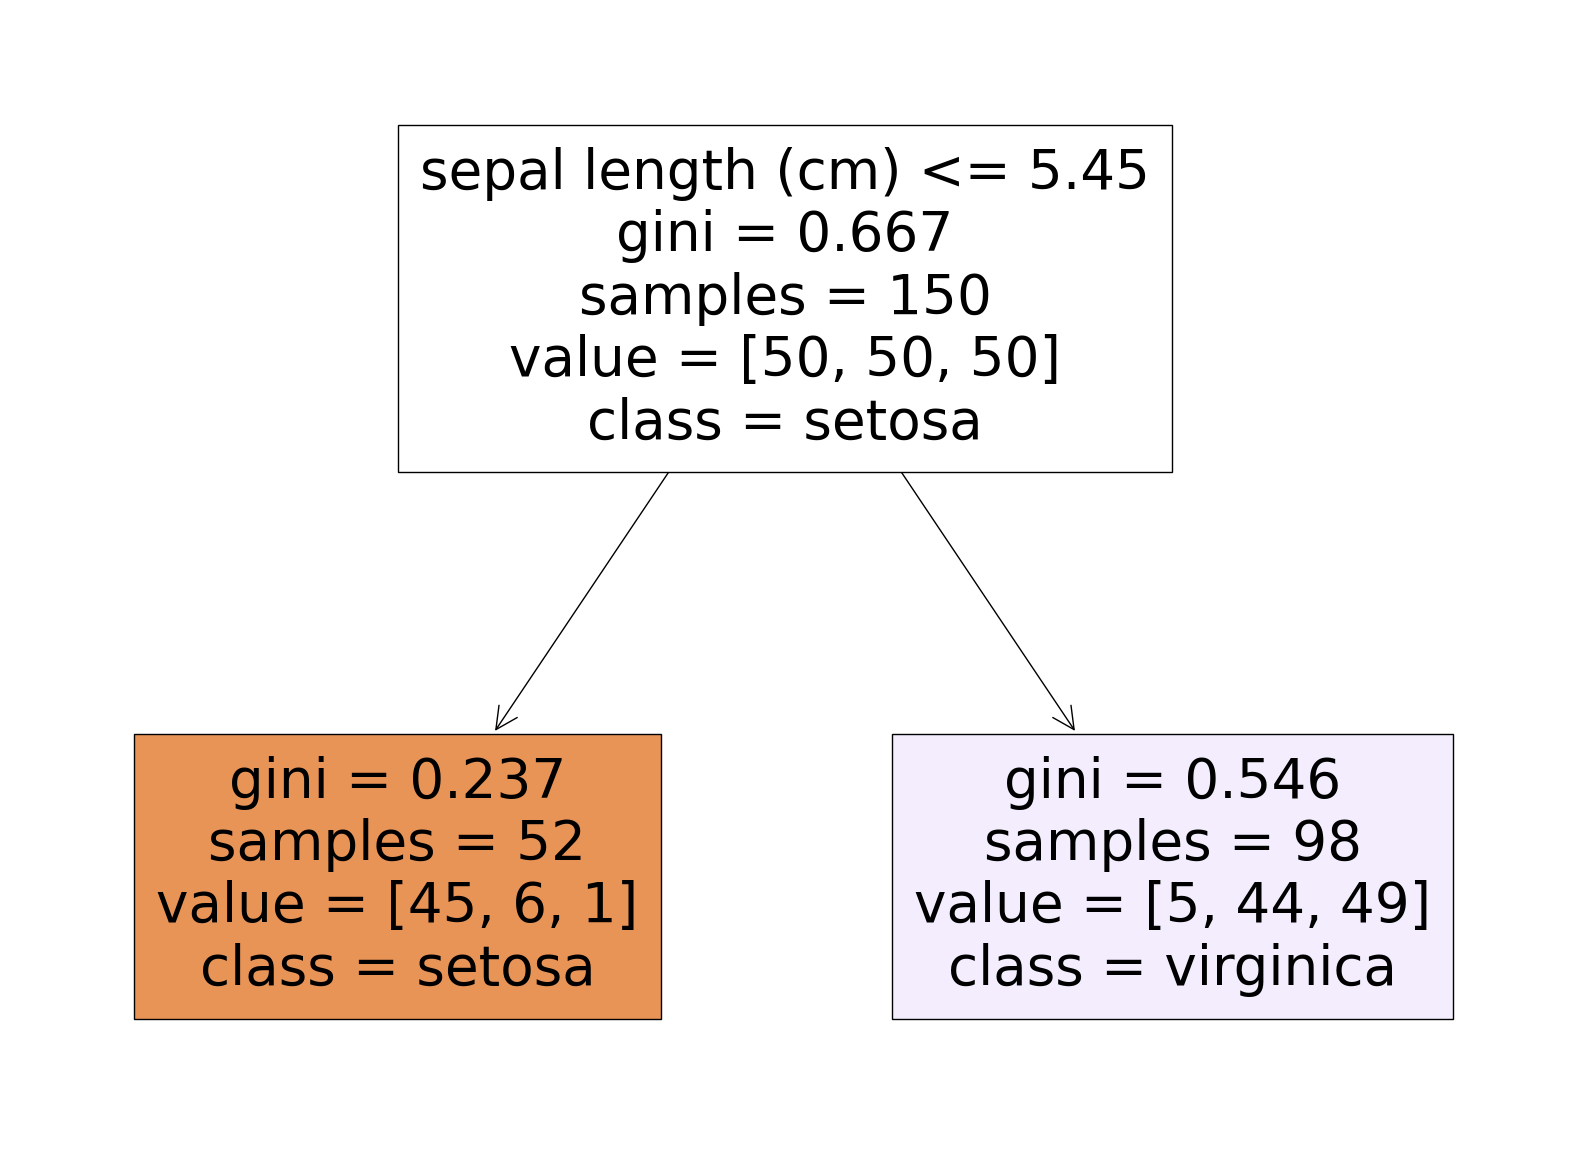

In [48]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(decision_tree_depth_1, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

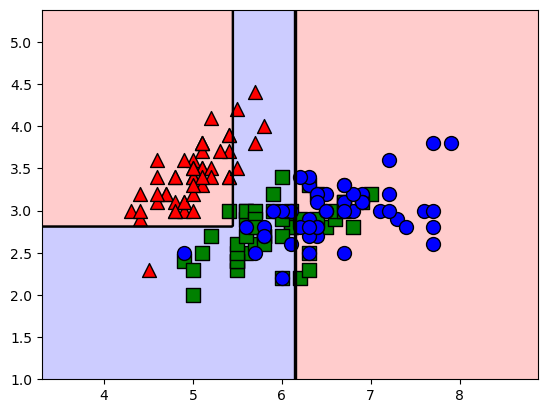

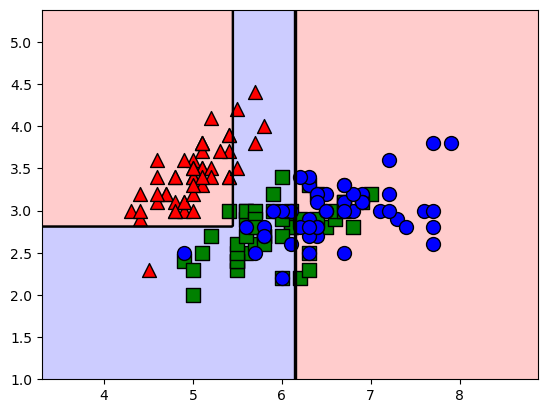

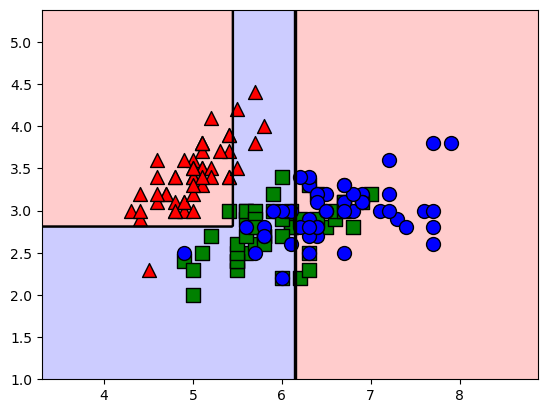

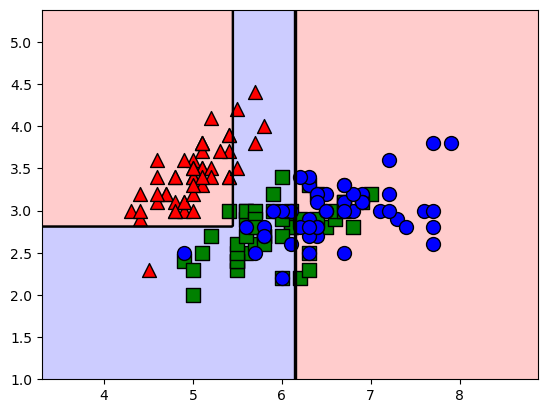

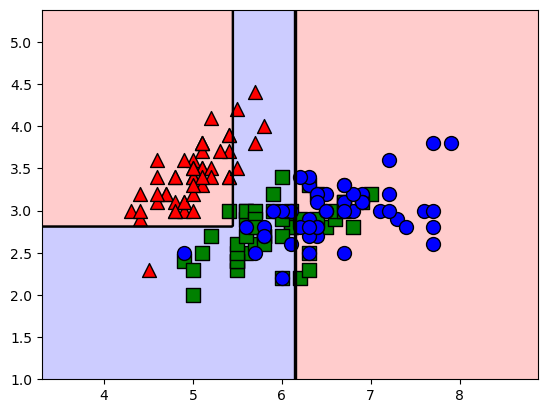

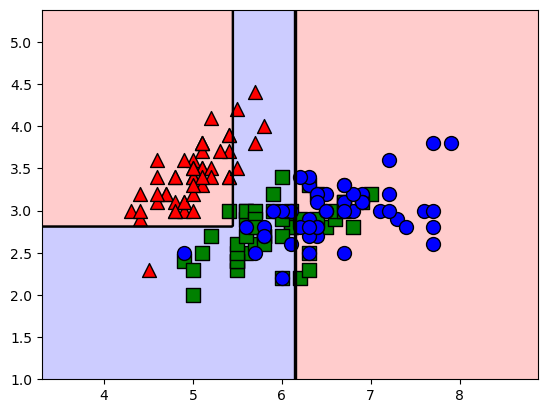

In [49]:
# Plot the 6 decision trees
for max_depth in range(1, 7):
    decision_tree_depth_2 = DecisionTreeClassifier(max_depth=2)
    decision_tree_depth_2.fit(features, y)
    plot_model(features, y, decision_tree_depth_2)
    plt.show()

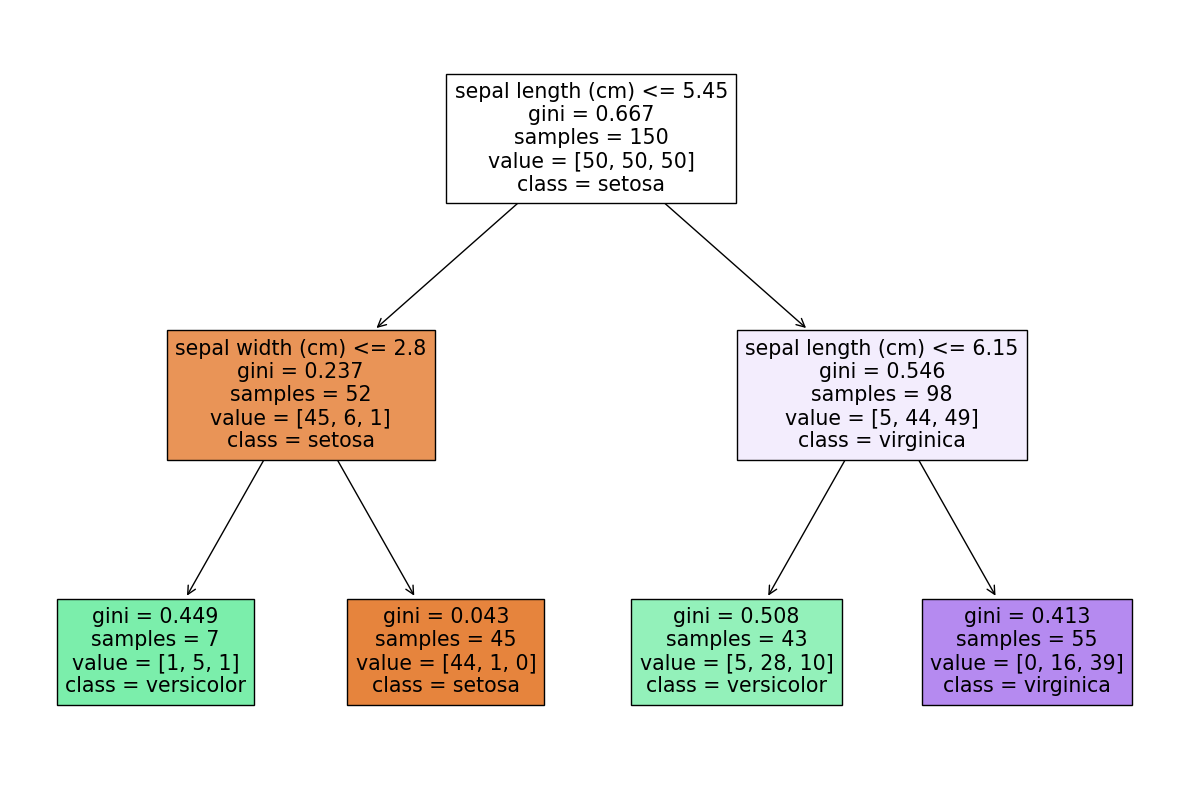

In [50]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(decision_tree_depth_2, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)